<a href="https://colab.research.google.com/github/anshikadwivedi018/Adobe_GenSolve_code/blob/main/My_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib svgwrite cairosvg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg


In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

def regularize_lines(paths_XYs):

    return paths_XYs

def regularize_circles(paths_XYs):

    return paths_XYs

def detect_symmetry(paths_XYs):

    return paths_XYs

def complete_curves(paths_XYs):

    return paths_XYs

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke='none', stroke_width=2))
    dwg.add(group)
    dwg.save()

    png_path = svg_path.replace('.svg', '.png')
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(url=svg_path, write_to=png_path, parent_width=W, parent_height=H, output_width=fact * W, output_height=fact * H, background_color='white')



In [ ]:
from google.colab import files

uploaded = files.upload()


for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving .DS_Store to .DS_Store (1)
Saving frag0.csv to frag0 (1).csv
Saving frag0.svg to frag0 (1).svg
Saving frag01_sol.csv to frag01_sol (1).csv
Saving frag01_sol.svg to frag01_sol (1).svg
Saving frag1.csv to frag1 (1).csv
Saving frag1.svg to frag1 (1).svg
Saving frag2.csv to frag2 (1).csv
Saving frag2.svg to frag2 (1).svg
Saving frag2_sol.csv to frag2_sol (1).csv
Saving frag2_sol.svg to frag2_sol (1).svg
Saving isolated.csv to isolated (1).csv
Saving isolated.svg to isolated (1).svg
Saving isolated_sol.csv to isolated_sol (1).csv
Saving isolated_sol.svg to isolated_sol (1).svg
Saving occlusion1.csv to occlusion1 (1).csv
Saving occlusion1.svg to occlusion1 (1).svg
Saving occlusion1_rec.png to occlusion1_rec (1).png
Saving occlusion1_rec.svg to occlusion1_rec (1).svg
Saving occlusion1_sol.csv to occlusion1_sol (1).csv
Saving occlusion1_sol.svg to occlusion1_sol (1).svg
Saving occlusion1_sol_rec.png to occlusion1_sol_rec (1).png
Saving occlusion1_sol_rec.svg to occlusion1_sol_rec (1).sv

In [ ]:
import svgwrite
import numpy as np

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()
    colours = ['red', 'green', 'blue', 'orange']

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))

        if path_data:
            group.add(dwg.path(d=" ".join(f"{cmd} {x},{y}" for cmd, (x, y) in path_data),
                               fill=c, stroke='none', stroke_width=2))

    dwg.add(group)
    dwg.save()


In [ ]:
completed_paths = [
    [np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])]
]


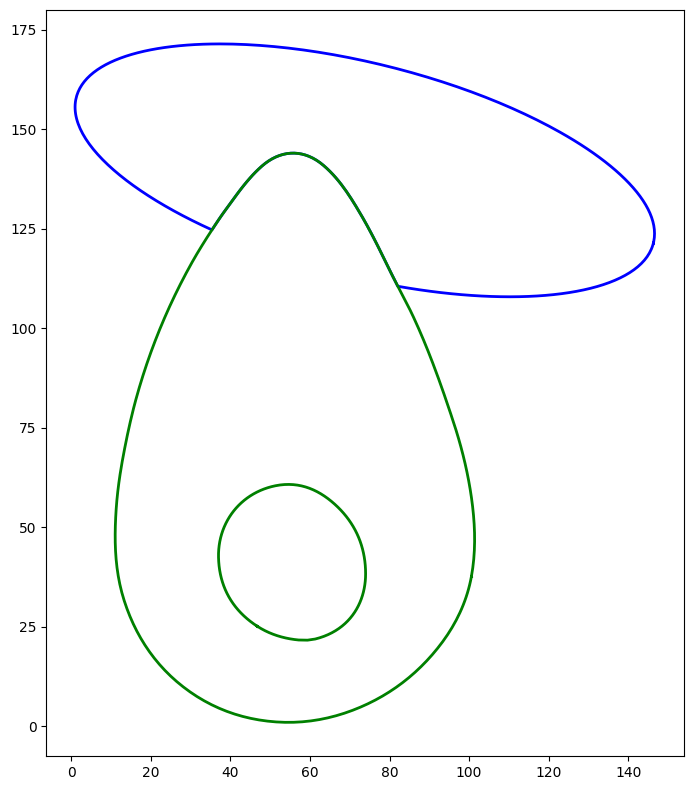

In [ ]:

csv_path = "occlusion1.csv"
paths_XYs = read_csv(csv_path)

plot(paths_XYs)

regularized_paths = regularize_lines(paths_XYs)
symmetry_paths = detect_symmetry(regularized_paths)
completed_paths = complete_curves(symmetry_paths)

svg_path = 'output1.svg'
polylines2svg(completed_paths, svg_path)


In [ ]:
import svgwrite
import numpy as np

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))

    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)


    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()


    colours = ['red', 'green', 'blue', 'orange']

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]

        for XY in path:
            path_data.append(f"M {XY[0, 0]},{XY[0, 1]}")
            for j in range(1, len(XY)):
                path_data.append(f"L {XY[j, 0]},{XY[j, 1]}")
            if not np.allclose(XY[0], XY[-1]):
                path_data.append("Z")


        path_d = " ".join(path_data)


        group.add(dwg.path(d=path_d, fill=c, stroke='none', stroke_width=2))

    dwg.add(group)
    dwg.save()


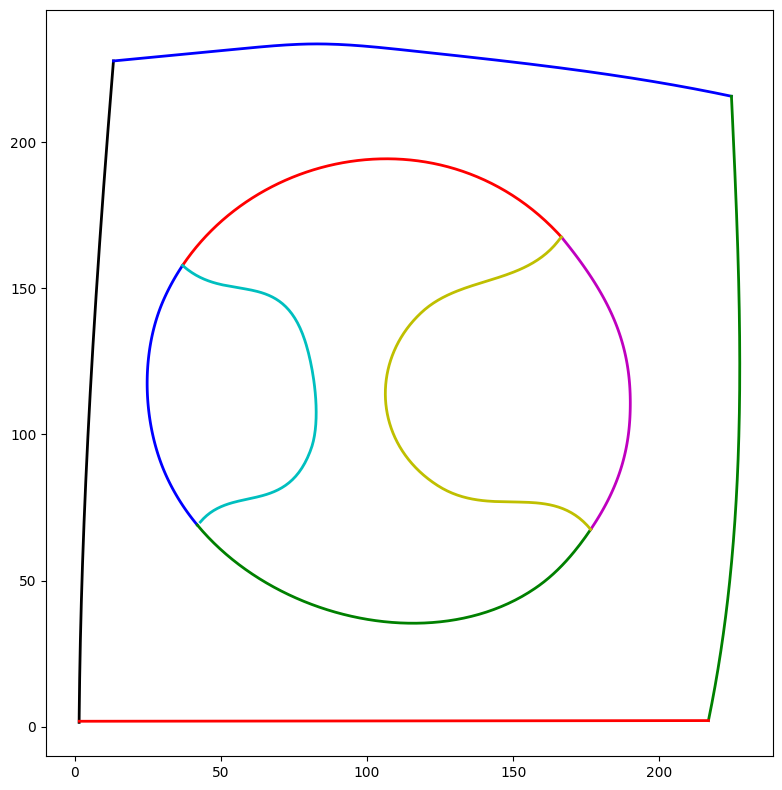

In [ ]:
csv_path = "frag0.csv"
paths_XYs = read_csv(csv_path)


plot(paths_XYs)

regularized_paths = regularize_lines(paths_XYs)
symmetry_paths = detect_symmetry(regularized_paths)
completed_paths = complete_curves(symmetry_paths)

svg_path = 'output2.svg'
polylines2svg(completed_paths, svg_path)

In [ ]:
import svgwrite
import numpy as np

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))

    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)


    dwg = svgwrite.Drawing(svg_path, profile='tiny', shape_rendering='crispEdges')
    group = dwg.g()


    colours = ['red', 'green', 'blue', 'orange']

    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]

        for XY in path:
            path_data.append(f"M {XY[0, 0]},{XY[0, 1]}")
            for j in range(1, len(XY)):
                path_data.append(f"L {XY[j, 0]},{XY[j, 1]}")
            if not np.allclose(XY[0], XY[-1]):
                path_data.append("Z")


        path_d = " ".join(path_data)

        group.add(dwg.path(d=path_d, fill=c, stroke='none', stroke_width=2))

    dwg.add(group)
    dwg.save()


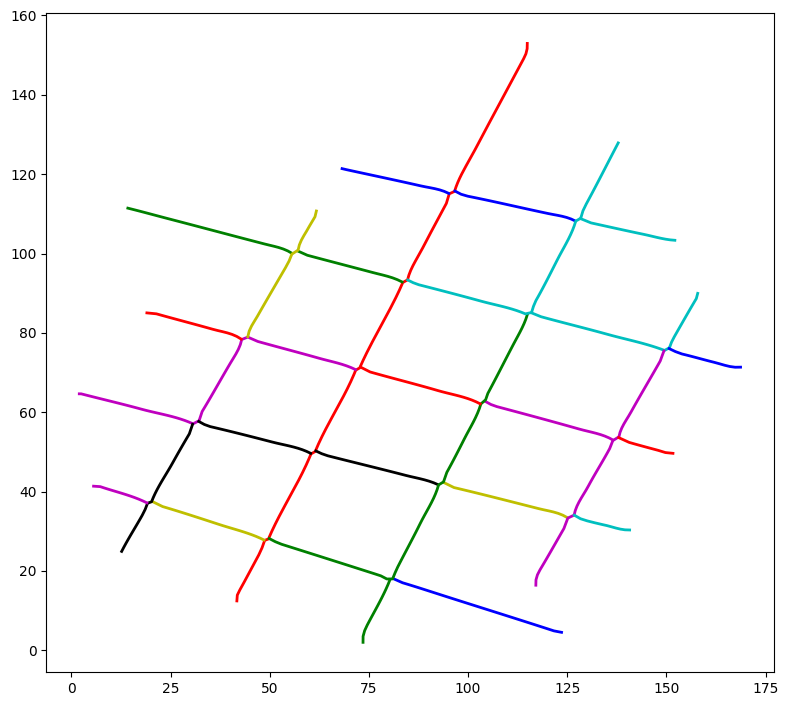

In [ ]:
csv_path = "frag2.csv"
paths_XYs = read_csv(csv_path)

plot(paths_XYs)


regularized_paths = regularize_lines(paths_XYs)
symmetry_paths = detect_symmetry(regularized_paths)
completed_paths = complete_curves(symmetry_paths)


svg_path = 'output3.svg'
polylines2svg(completed_paths, svg_path)

In [ ]:
files.download('output1.svg')
files.download('output2.svg')
files.download('output3.svg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>